In [2]:
# Import Libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

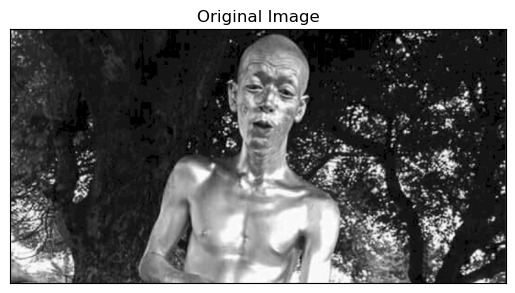

In [4]:

# Membaca citra sebagai Grayscale
img = cv2.imread('bayu.png', cv2.IMREAD_GRAYSCALE)

# Membuat kernel
kernel = np.ones((5,5),np.uint8)

plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

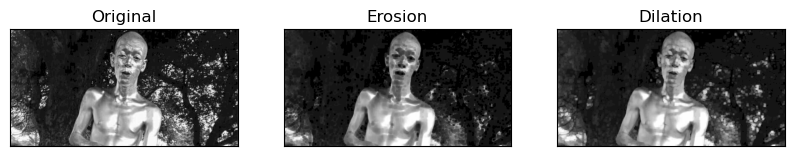

In [5]:
# Erosion
erosion = cv2.erode(img,kernel,iterations = 1)

# Dilation
dilation = cv2.dilate(erosion,kernel,iterations = 1)

# Mengatur ukuran gambar hasil
plt.rcParams["figure.figsize"] = (10,10)

# Plot!
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(erosion, cmap = 'gray')
plt.title('Erosion'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilation, cmap = 'gray')
plt.title('Dilation'), plt.xticks([]), plt.yticks([])
plt.show()

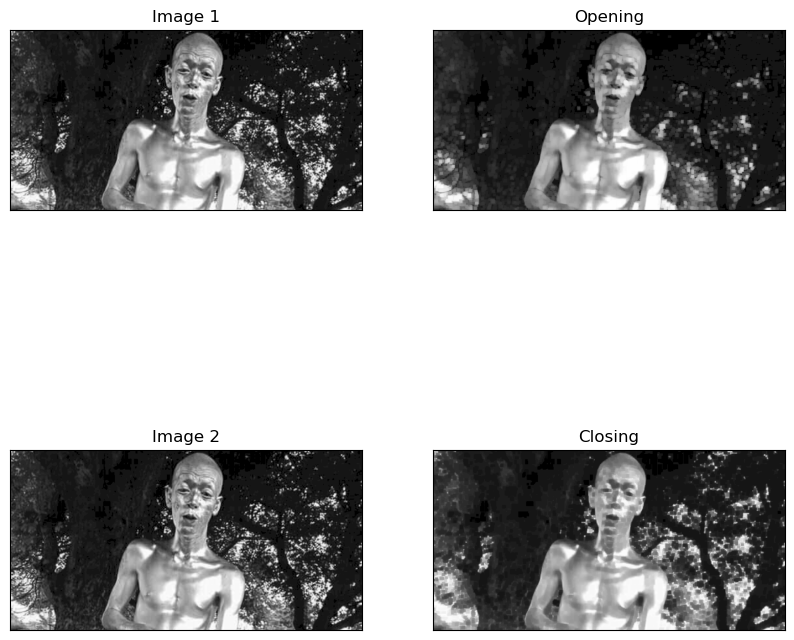

In [7]:
kernel = np.ones((5,5),np.uint8)

# Opening
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Closing
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Plot!
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(opening, cmap = 'gray')
plt.title('Opening'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img, cmap = 'gray')
plt.title('Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(closing, cmap = 'gray')
plt.title('Closing'), plt.xticks([]), plt.yticks([])
plt.show()

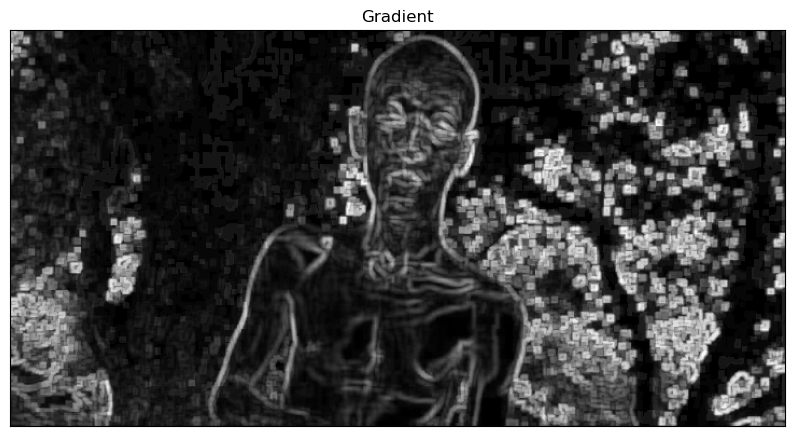

In [8]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.imshow(gradient, cmap = 'gray')
plt.title('Gradient'), plt.xticks([]), plt.yticks([])
plt.show()

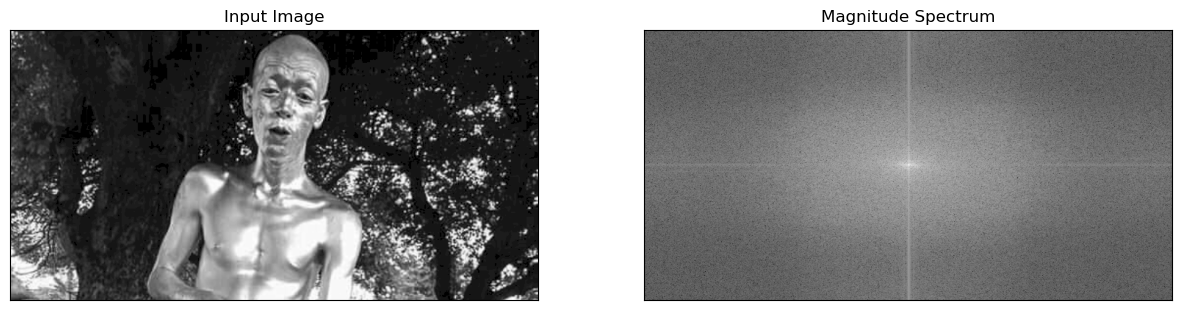

In [9]:
img_float32 = np.float32(img)

# Forward FFT (transformasi citra ke domain frekuensi)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# Plot hasil
plt.rcParams["figure.figsize"] = (15,15)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

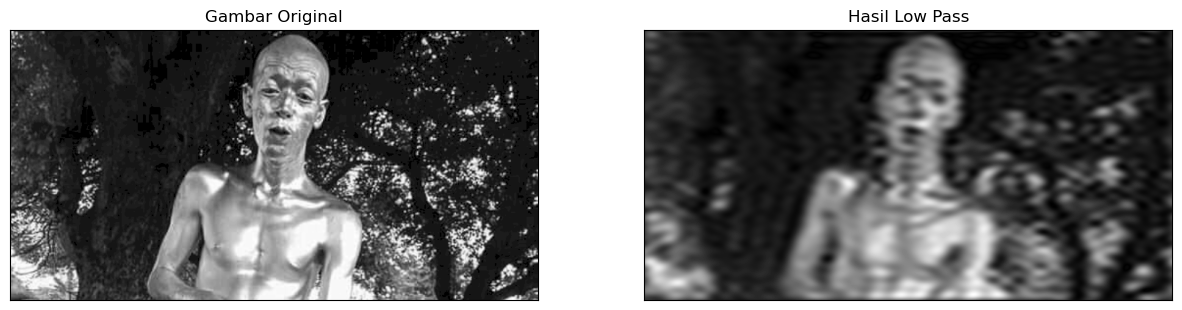

In [11]:
# Membuat mask
rows, cols = img.shape
crow, ccol = rows//2 , cols//2

mask = np.zeros((rows,cols,2), np.uint8)
mask[crow-25:crow+25, ccol-25:ccol+25] = 1 # ukuran mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

# Inverse FFT (mentransformasi kembali ke domain spasial)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# Plot hasil
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Gambar Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Hasil Low Pass'), plt.xticks([]), plt.yticks([])
plt.show()

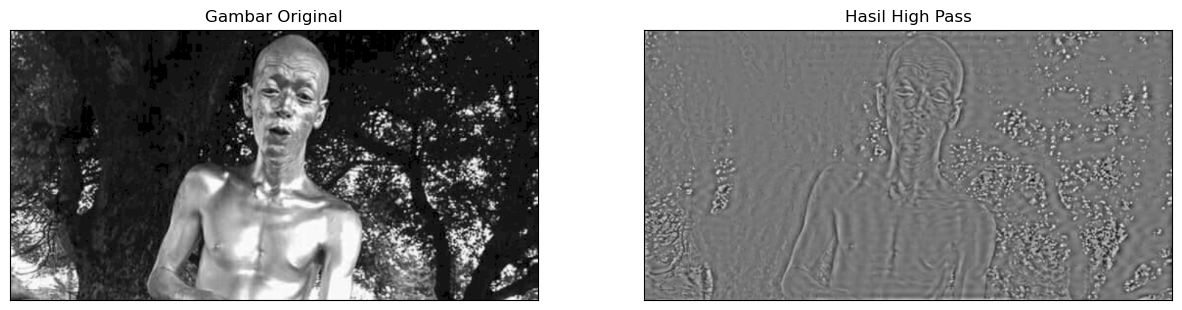

In [12]:
# Percobaan untuk High Pass Filtering

# Forward FFT (konversi citra dari domain spasial ke domain frekuensi)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Membuat mask high pass
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0 # ukuran mask

# Mengalikan mask dengan Forward FFT
f_ishift = np.fft.ifftshift(fshift)

# Inverse FFT (mentransformasi kembali ke domain spasial)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

# Plot hasil
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Gambar Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Hasil High Pass'), plt.xticks([]), plt.yticks([])
plt.show()

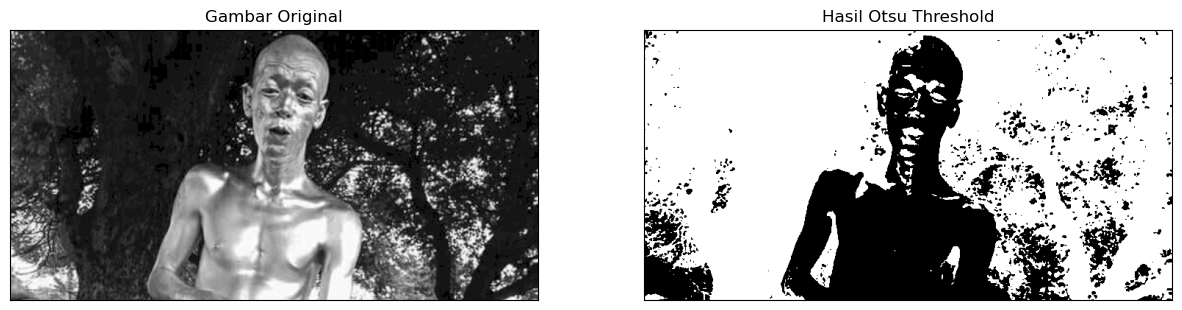

In [15]:
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Gambar Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, cmap='gray')
plt.title('Hasil Otsu Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

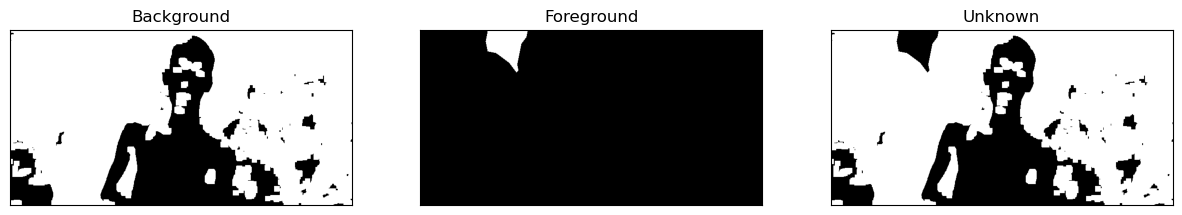

In [16]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.subplot(131),plt.imshow(sure_bg, cmap='gray')
plt.title('Background'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sure_fg, cmap='gray')
plt.title('Foreground'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(unknown, cmap='gray')
plt.title('Unknown'), plt.xticks([]), plt.yticks([])
plt.show()

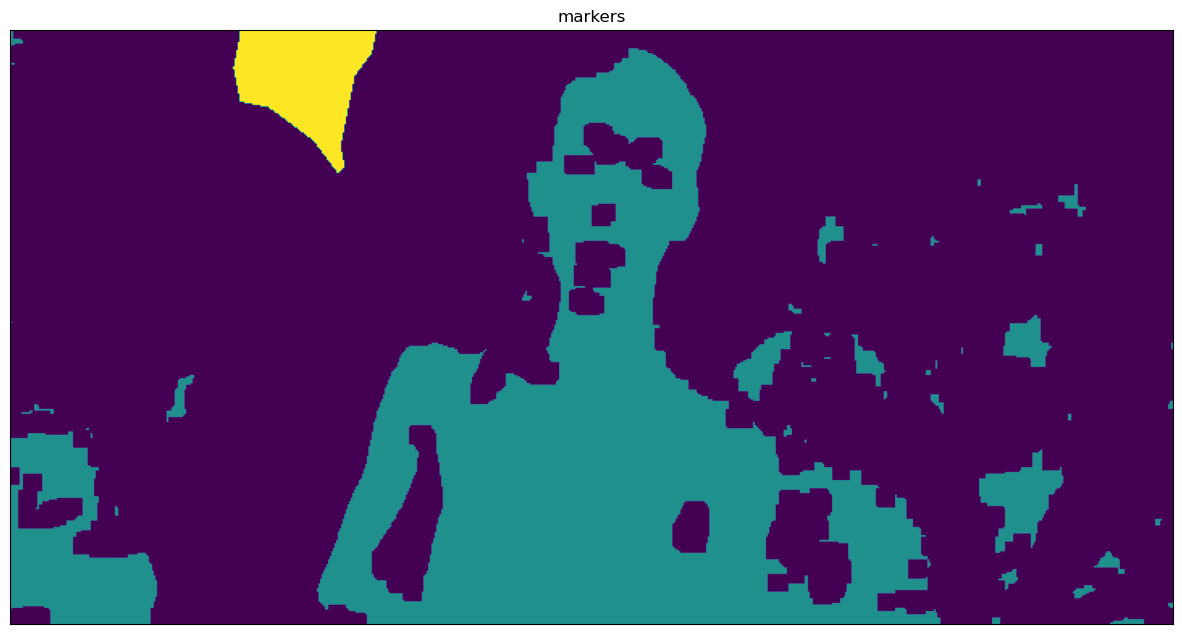

In [17]:
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers)
plt.title('markers'), plt.xticks([]), plt.yticks([])
plt.show()

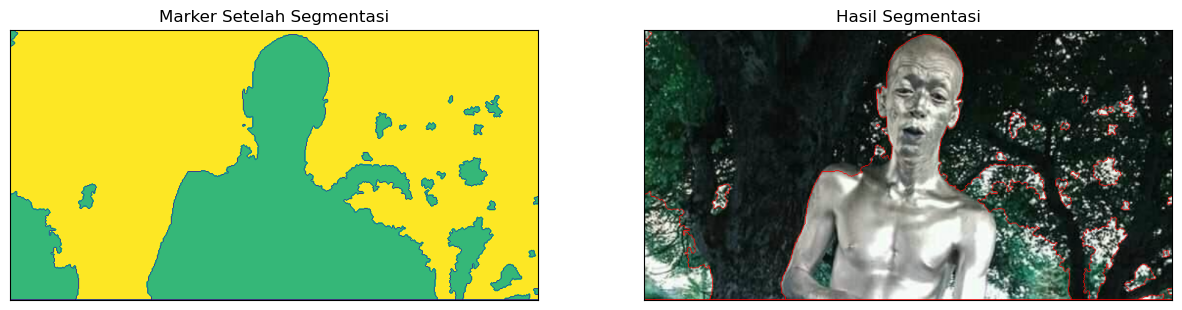

In [19]:
img2 = cv2.imread('bayu.png')
markers = cv2.watershed(img2,markers)

img2[markers == -1] = [255,0,0] # warna garis edge

plt.subplot(121),plt.imshow(markers)
plt.title('Marker Setelah Segmentasi'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2)
plt.title('Hasil Segmentasi'), plt.xticks([]), plt.yticks([])
plt.show()